In [21]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('/content/sample_data/housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


### convert our dataframe into an array

In [5]:
dataset = df.values
dataset


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

### We now split our dataset into Features (X), the feature we wish to predict (Y)

In [6]:
X=dataset[:,0:10]
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [7]:
Y=dataset[:,10]
Y

array([1, 1, 1, ..., 1, 0, 0])

#### Features such as lot area are in the order of the thousands, a score for overall quality is ranged from 1 to 10, and the number of fireplaces tend to be 0, 1 or 2 so, we need to scale our data to make all the input features similar.

##### we use a function called the min-max scaler, which scales the dataset so that all the input features lie between 0 and 1 inclusive

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

#### Split our data into train,test,validation.

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [12]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


#### Building the model

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Training phase

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 16ms/step - loss: 0.7127 - accuracy: 0.4251 - val_loss: 0.7020 - val_accuracy: 0.4658
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.4556 - val_loss: 0.6971 - val_accuracy: 0.3881
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.4395 - val_loss: 0.6935 - val_accuracy: 0.4155
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.4879 - val_loss: 0.6901 - val_accuracy: 0.4338
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5047 - val_loss: 0.6870 - val_accuracy: 0.4429
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.4910 - val_loss: 0.6840 - val_accuracy: 0.4475
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5027 - val_loss: 0.6806 - val_accuracy: 0.4612
Epoch 8/100


#### Evaluate the model

In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8904


0.8904109597206116

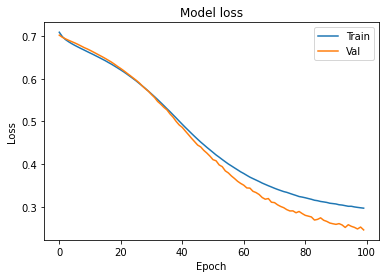

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()